In [ ]:
import numpy as np
x = np.array([1,2,3,1,1,1])
h = np.array([1,2,2,-1,1])
print("x ：", x)
print("h ：", h)
print("convultion :", np.convolve(x, h, 'same'))

x ： [1 2 3 1 1 1]
h ： [ 1  2  2 -1  1]
convultion : [ 9 10  8  4  6  2]


In [ ]:
import numpy as np
from scipy.signal import convolve2d
f = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
h = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])
print("convultion g ：")
print(convolve2d(f, h, 'same'))

convultion g ：
[[ 7 14 13]
 [10 20 18]
 [ 7 14 13]]


In [ ]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

arr = np.array([[1, 1, 1, 3, 3],
                [1, 1, 3, 3, 3],
                [1, 3, 3, 3, 6],
                [3, 3, 3, 6, 6],
                [3, 3, 6, 6, 7]], dtype = 'uint8')

def sobel_gradient(need):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    grad_x = cv2.filter2D(arr, cv2.CV_32F, sobel_x)
    grad_y = cv2.filter2D(arr, cv2.CV_32F, sobel_y)

    if need == 'magnitude':
        return np.uint8(np.clip(abs(grad_x) + abs(grad_y), 0, 255))
    elif need == 'angle':
        return np.arctan(grad_y / grad_x)

print('M(x, y) : ')
print(sobel_gradient('magnitude'))
print('degree : ')
print(sobel_gradient('angle'))

M(x, y) : 
[[ 0  4  8  4  0]
 [ 4 12 12 10  6]
 [ 8 12 10 18 12]
 [ 4 10 18 20  8]
 [ 0  6 12  8  0]]
degree : 
[[      nan 0.        0.        0.              nan]
 [1.5707964 0.7853982 0.7853982 0.7853982 1.5707964]
 [1.5707964 0.7853982 0.7853982 0.7853982 1.5707964]
 [1.5707964 0.7853982 0.7853982 0.7853982 1.5707964]
 [      nan 0.        0.        0.              nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


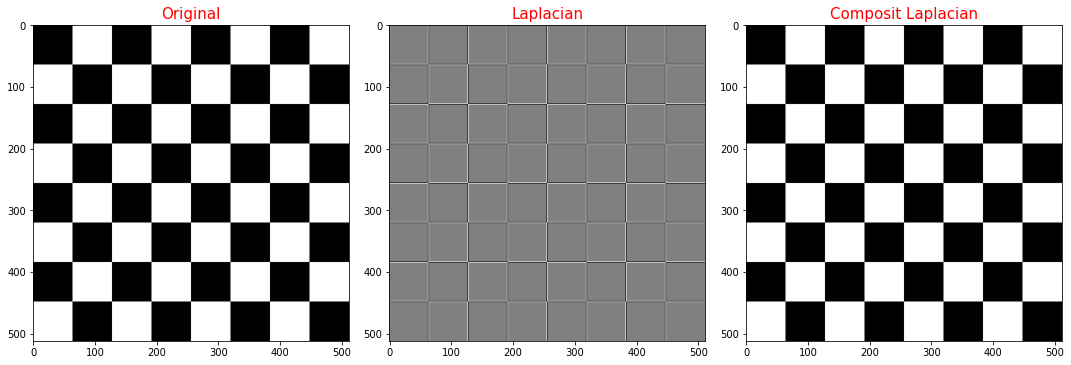

In [25]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow 
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/chessboard.bmp", -1)

def laplacian(img):
    return np.uint8(np.clip(cv2.Laplacian(img, cv2.CV_32F) + 128, 0, 255))

def composit_laplacian(img):
    return np.uint8(np.clip(cv2.filter2D(img, cv2.CV_32F, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])), 0, 255))

images = [img, laplacian(img), composit_laplacian(img)]
titles = ['Original', 'Laplacian', 'Composit Laplacian']

plt.figure(figsize = (15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i], fontsize = 15, color = 'r')

plt.tight_layout()
plt.show()